# Stationary Distributions
### by [Jason DeBacker](http://jasondebacker.com), July 2017
This Jupyter notebook was written using Python 3.6.  To execute all the code here, one will need a pickle file called `firm_objects.pkl` and for this to be in the same directory as this notebook.

An important part of being able to solve for and analyze the steady state of a model with heterogeneous agents is to be able to solve for the stationary distribution.  This notebook works through how one solves for a stationary distribuiton of a Markov chain with an application to the problem of firm dynamics.

## 1. Theory

Consider the finite set $S=\{s_{1}, s_{2},\ldots,s_{l}\}$.  Let $\Pi$ represent a Markov chain (i.e., a Markov process over a finite state space) over the finite set.  The Markov chain is represented by this matrix, where each element is the conditional probability of moving from one element in the set to another: $\pi_{i, j} = P(s_{i}|s_{j})$.  Let $p_{t} = (p_{1}, p_{2},\ldots, p_{l})$ be the density over the elements of $S$ in period $t$. Let the $l$-length vector $p_{t+1}$ be the density over the elements of $S$ in $t+1$.  To find $p_{t+1}$ we just need to operate on the period $t$ distribution with the Markov matrix:

$$ p_{t+1} = p_{t}\Pi $$

We can work forward in time by repeatedly applying this operator: 

$$ p_{t+2} = p_{t+1}\Pi = (p_{t}\Pi)\Pi = p_{t}\Pi^{2} $$

e.g., 

In [2]:
# import packages
import numpy as np

# set Pi
Pi = np.array([[0.75, 0.25], [0.25, 0.75]])
print('Pi = ', Pi)

p_t = np.array([0.1, 0.9])
p_tp1 = np.dot(p_t,Pi)
print('p_{t} = ', p_t, ', p_{t+1} = ', p_tp1)

Pi =  [[ 0.75  0.25]
 [ 0.25  0.75]]
p_{t} =  [ 0.1  0.9] , p_{t+1} =  [ 0.3  0.7]


Since $\Pi$ is a Markov matrix, then so is $\Pi^{2}$ and $\Pi^{3}$ and so on.  Thus we have: 

$$p_{t+n} = p_{t}\Pi^{n} $$

Now consider the limit of this process.  What is $\Pi^{\infty}$?  What is $p_{\infty}$?  Does it depend on $p_{0}$?  

[For a formal treatment of these sequences, please see Stokey and Lucas (1989, pp. 319-334).  Below I only provide rough sketches of the intution behind the mathematics.]

First, to think about $\Pi^{\infty}$ recall that each element along the sequence $\{\Pi\}_{t=0}^{n}$ was a Markov matrix. Extending this, one can see that the limit of this sequence will also be a Markov matrix since it is obtained by repeated multiplcation of one Markov matrix with another.  However, there may be not limiting Markov matrix.  For, there may be cycling in the limit.  Thus the condition that holds in general is that  the average of these sequence converges for any Markov chain.  i.e., if $Q$ is the limit of a convergent sequence: 

$$ \lim_{k\rightarrow \infty} \frac{1}{n_{}k} \sum{m=0}^{n_{k}-1} \Pi^{m} = Q $$

E.g., Consider the Markov matrix

$$ \Pi = \begin{bmatrix}
   0 & 1 \\
    1 & 0 \\
\end{bmatrix} $$

Along the sequence $\{\Pi\}_{t=0}^{n}$ we find that cycling between $\Pi$ and $I$ (the identity matrix). For all odd $n$, we'd have $\Pi$ and for all even $n$ we'd have $I$.

Now, what about the limit of the sequence $\{p_{t}\}_{t=0}^{\infty}$?  This is more difficult to determine and it depends on what $\Pi$ looks like.   The limit of the sequence might be a stationary (or invariant) distribution or the sequence may produce cycles in the limit.  In the case of the sequence approaching a stationary distribution, this distribuiton might be unique or there could be multiple.

A stationary distribution is a probility distribution that is unchanged when operated on by a Markov process.  That is, $p^{*} = (p^{*}_{1}, p^{*}_{2},\ldots,p^{*}_{l})$  is a stationary distribution of the Markov process given by the $l \times l$ Markov matrix $\Pi$ if:

$$ p^{*}\Pi = p^{*} $$

How do we get to this stationary distribution?  We can find the stationary distribution in two ways.  The first would be to apply some linear algebra.  In particular, if the transpose of the Markov matrix, $\Pi^{T}$, has eigenvectors with eigenvalues of 1, then those eigenvectors are stationary distributions.  However, the eigenvalue method is a consequence of the Perron-Frobenius theorem and only works for an irreducible, aperiodic matrix. When you have reducible or periodic Markov processes, you will want to use numerical computing.  

As an example:

In [3]:
# Compute limit of Pi...
print('Pi ** 2 = ', np.dot(Pi,Pi))
print('Pi ** 3 = ', np.linalg.matrix_power(Pi, 3))
print('Pi ** 4 = ', np.linalg.matrix_power(Pi, 4))
print('Pi ** 5 = ', np.linalg.matrix_power(Pi, 5))
print('Pi ** 100 = ', np.linalg.matrix_power(Pi, 100))
print('Pi ** 1000 = ', np.linalg.matrix_power(Pi, 1000))

Pi ** 2 =  [[ 0.625  0.375]
 [ 0.375  0.625]]
Pi ** 3 =  [[ 0.5625  0.4375]
 [ 0.4375  0.5625]]
Pi ** 4 =  [[ 0.53125  0.46875]
 [ 0.46875  0.53125]]
Pi ** 5 =  [[ 0.515625  0.484375]
 [ 0.484375  0.515625]]
Pi ** 100 =  [[ 0.5  0.5]
 [ 0.5  0.5]]
Pi ** 1000 =  [[ 0.5  0.5]
 [ 0.5  0.5]]


In [4]:
# Find eigenvector of Pi
eig_values, eig_vectors = np.linalg.eig(Pi)
print('Eigenvalues = ', eig_values)
print('Eigenvectors = ', eig_vectors)

Eigenvalues =  [ 1.   0.5]
Eigenvectors =  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [5]:
# Now we'll put out the eigenvector the corresponds to eigenvalue 1
eig_vec1 = eig_vectors[:,0]

# And compute the stationary distribution this reporsents:
SD_eig = eig_vec1/eig_vec1.sum()
print('Stationary distribution of Pi = ', SD_eig)

Stationary distribution of Pi =  [ 0.5  0.5]


In [6]:
# Now lets find the stationary distribution through a computational approach
# That is, repeatedly apply the transition matrix to an initial distribution

# set initial distribution (can be anything):
p0 = np.array([0.7, 0.3])

# SD = p0 * Pi ** a_big_number
print('Stationary distribution of Pi = ', np.dot(p0,
      np.linalg.matrix_power(Pi, 100)))

Stationary distribution of Pi =  [ 0.5  0.5]


## 2. Application to Firm Dynamics

Now we'll apply the theory of stationary distributions to determine the stationary distribution of the model of firm dynamics we've been working with.  

### 2.1 Defining the distribution of firms
Since we are analyzing the firm problem in the steady-state, it is the case that the idiosyncratic shocks to firm productivity are the only source of uncertainty in the model.  At each point in time the economy is characterized by a measure of firms, $\Gamma_{t}(k,z;w)$ for each level of capital stock $k\in \mathbf{K}= [\underline{k},\bar{k}]$ and productivity, $z\in \mathbf{Z}=[\underline{z},\bar{z}]$.  For there to be a stationary measure of firms, it must be the case that firms never accumulate capital beyond some endogenously determined level $\bar{k}$.  If the optimal decision rule for capital accumulation is increasing in $z$, it is clear the value of $\bar{k}$ is determined by the point at which the decision rule $k'(k,\bar{z};w)$ crosses the $45\,^{\circ}$ line. 

The law of motion of $\Gamma_{t}(k,z;w)$ is given by:

$$ \Gamma_{t+1}=H_{t}(\Gamma_{t}) $$
  
 Let $A$ and $B$ be Borel sets of $\mathbf{K}$ and $\mathbf{Z}$ respectively and let $P(z,z')$ be the probability the firm transitions from a productivity of $z$ to productivity $z'$.  The function $H_t$ can then be written as follows:
  
$$ \Gamma_{t+1}(A \times B)= \int  \mathbf{1}_{\{k'(k,z;w)\in A\}} P(z,B) \Gamma_{t}(dk,dz;w), $$

where $\mathbf{1}$ is the indicator function.

### 2.2 The stationary distribution of firms

The steady-state will be defined by an invariant distribution of firms denoted $\Gamma^{*}$.  The invariant distribution is found by solving for the fixed point in the mapping given by $H$.  That is, $\Gamma^{*}$ solves $\Gamma^{*}=H(\Gamma^{*})$.  Stokey and Lucas (p. 342, 1989) state the conditions necessary to prove the existence of an invariant distribution.  The decision rules of the firms and the stochastic process give rise to the mapping from the current distribution of firms to the distribution of firms next period.  One can show that $\Gamma^{*}$ exists, is unique, and the sequence of measures generated by the transition fuction, $\{H^{n}(\Gamma_{0})\}^{\infty}_{n=0}$ converges weakly to $\Gamma^{*}$ from any $\Gamma^{0}$.  We will normalize the measure of firms to one.  

### 2.3 Solving for the stationary distribution

We'll solve for this distribution compuationally.  To do so, we'll need the firms' policy functions and the transition matrix for the productivity shocks.  Rather than writing the code to solve the firm's problem, let me read in the policy functions and transition matrix generated elsewhere.

In [7]:
# import packages
import pickle

# read in stored objects
firm_dict = pickle.load(open('firm_objects.pkl', 'rb'))

# for finding the stationary distribution
Pi = firm_dict['Pi']  # the transition matrix for productivity shocks
PF = firm_dict['PF']  # the firm's policy function: k'(z,k)
sizez, sizek = PF.shape

# To plot the stationary distribution
z = firm_dict['z']  # the grid of productivity shocks
kvec = firm_dict['kvec'] # the grid of capital

'''
------------------------------------------------------------------------
Compute the stationary distribution of firms over (k, z)
------------------------------------------------------------------------
SDtol     = tolerance required for convergence of SD
SDdist    = distance between last two distributions
SDiter    = current iteration
SDmaxiter = maximium iterations allowed to find stationary distribution
Gamma     = stationary distribution
HGamma    = operated on stationary distribution
------------------------------------------------------------------------
'''
Gamma = np.ones((sizez, sizek)) * (1 / (sizek * sizez))
SDtol = 1e-12
SDdist = 7
SDiter = 0
SDmaxiter = 1000
while SDdist > SDtol and SDmaxiter > SDiter:
    HGamma = np.zeros((sizez, sizek))
    for i in range(sizez):  # z
        for j in range(sizek):  # k
            for m in range(sizez):  # z'
                HGamma[m, PF[i, j]] = \
                    HGamma[m, PF[i, j]] + Pi[i, m] * Gamma[i, j]
    SDdist = (np.absolute(HGamma - Gamma)).max()
    Gamma = HGamma
    SDiter += 1

if SDiter < SDmaxiter:
    print('Stationary distribution converged after this many iterations: ',
          SDiter)
else:
    print('Stationary distribution did not converge')

Stationary distribution converged after this many iterations:  119


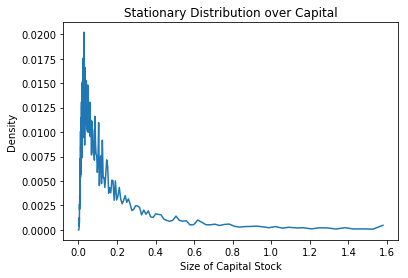

In [8]:
## plot the SD

# import packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# to print plots inline
%matplotlib inline
    
# Plot the stationary distribution over k
fig, ax = plt.subplots()
ax.plot(kvec, Gamma.sum(axis=0))
plt.xlabel('Size of Capital Stock')
plt.ylabel('Density')
plt.title('Stationary Distribution over Capital')

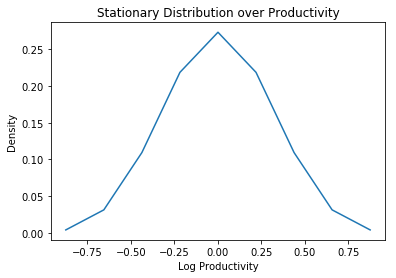

In [9]:
# Plot the stationary distribution
fig, ax = plt.subplots()
ax.plot(np.log(z), Gamma.sum(axis=1))
plt.xlabel('Log Productivity')
plt.ylabel('Density')
plt.title('Stationary Distribution over Productivity')

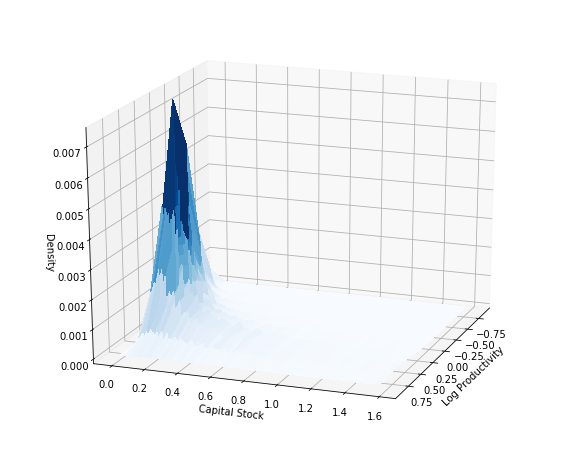

In [10]:
# Stationary distribution in 3D
zmat, kmat = np.meshgrid(kvec, np.log(z))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kmat, zmat, Gamma, rstride=1, cstride=1, cmap=cm.Blues,
                linewidth=0, antialiased=False)
ax.view_init(elev=20., azim=20)  # to rotate plot for better view
ax.set_xlabel(r'Log Productivity')
ax.set_ylabel(r'Capital Stock')
ax.set_zlabel(r'Density')

## 3. References
* Stokey, Nancy L. and Robert E. Lucas and Edward C. Prescott, *Recursive Methods in Economic Dynamics*, Harvard University Press (1989).